In [1]:
import os
from collections import defaultdict
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
com_df = pd.read_csv("mapequation_com_entropy.csv", index_col=0)
com_df = com_df[["node"]+[ col for col in com_df.columns if "_ent_" in col ]]
com_df.head()

,node,weekday_com_ent_in,weekday_com_ent_out,weekend_com_ent_in,weekend_com_ent_out
ind,,,,,
0,TAMPINES EAST,0.353991,0.311314,0.294636,0.294559
1,BEDOK NORTH,0.229097,0.178567,0.346991,0.281375
2,TOA PAYOH CENTRAL,0.503925,0.463503,0.519752,0.497265
3,ALJUNIED,0.401774,0.432890,0.293779,0.342999
4,TAMPINES WEST,0.249632,0.302093,0.199284,0.215336


In [30]:
core_df = pd.read_csv("k_shell_decomposition_result_entropy.csv", index_col=0)
core_df = core_df[["node"]+[ col for col in core_df.columns if "_ent_" in col ]]
core_df.head()

,node,weekday_ksc_ent_in,weekday_ksc_ent_out,weekend_ksc_ent_in,weekend_ksc_ent_out
ind,,,,,
0,ADMIRALTY,0.997714,0.771458,0.999947,0.779104
1,AIRPORT ROAD,0.665975,0.100550,0.683295,0.324450
2,ALEXANDRA HILL,0.679349,0.530146,0.883398,0.521277
3,ALEXANDRA NORTH,0.986702,0.551673,0.927997,0.682645
4,ALJUNIED,0.524651,0.625371,0.437139,0.536421


In [5]:
node_df = pd.read_csv("node_density_stat_normalized.csv", index_col=0)
node_df = node_df.reset_index()
node_df.head()

,node,in_degree_weekday,out_degree_weekday,PageRank_weekday,HITS_hub_weekday,HITS_authority_weekday,in_degree_weekend,out_degree_weekend,PageRank_weekend,HITS_hub_weekend,HITS_authority_weekend
0,ADMIRALTY,0.085027,0.064088,0.095081,0.008601,0.008298,0.102220,0.077090,0.106444,0.018868,0.020532
1,AIRPORT ROAD,0.011361,0.011493,0.009982,0.004666,0.003565,0.000480,0.001954,0.000290,0.000752,0.000519
2,ALEXANDRA HILL,0.228828,0.186487,0.251906,0.004467,0.006607,0.220776,0.165543,0.252229,0.009051,0.014105
3,ALEXANDRA NORTH,0.016157,0.026450,0.016741,0.000569,0.000313,0.010959,0.015612,0.011660,0.000763,0.000551
4,ALJUNIED,0.585613,0.536596,0.530093,0.123671,0.172411,0.678239,0.641214,0.620737,0.200231,0.289960


In [31]:
entropy_df = pd.merge(com_df, core_df, left_on="node", right_on="node")
entropy_df.head()

,node,weekday_com_ent_in,weekday_com_ent_out,weekend_com_ent_in,weekend_com_ent_out,weekday_ksc_ent_in,weekday_ksc_ent_out,weekend_ksc_ent_in,weekend_ksc_ent_out
0,TAMPINES EAST,0.353991,0.311314,0.294636,0.294559,0.739688,0.602029,0.742309,0.577384
1,BEDOK NORTH,0.229097,0.178567,0.346991,0.281375,0.278536,0.362557,0.303022,0.385173
2,TOA PAYOH CENTRAL,0.503925,0.463503,0.519752,0.497265,0.862226,0.891770,0.927147,0.953020
3,ALJUNIED,0.401774,0.432890,0.293779,0.342999,0.524651,0.625371,0.437139,0.536421
4,TAMPINES WEST,0.249632,0.302093,0.199284,0.215336,0.246644,0.407002,0.239497,0.342111


In [32]:
len(entropy_df)

303

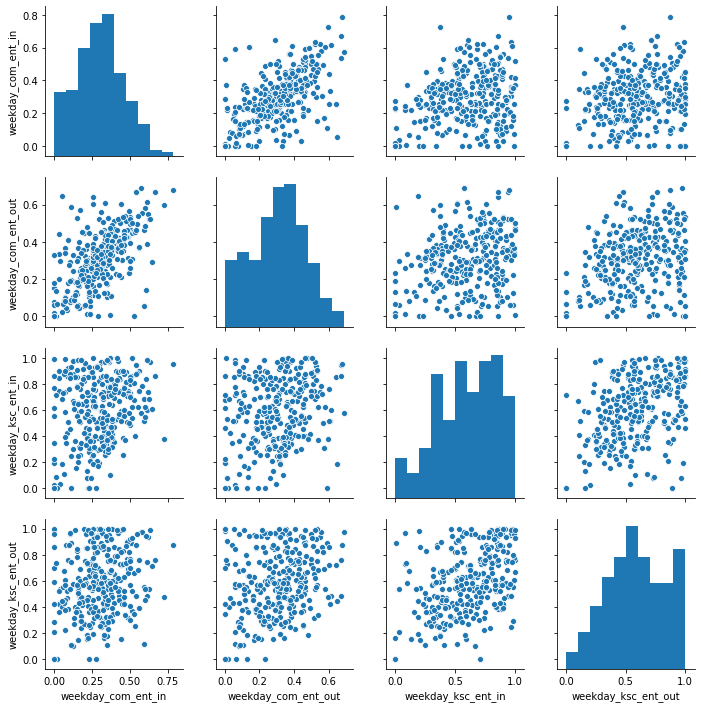

In [33]:
sns.pairplot(entropy_df[[ col for col in entropy_df.columns if "weekday" in col ]])

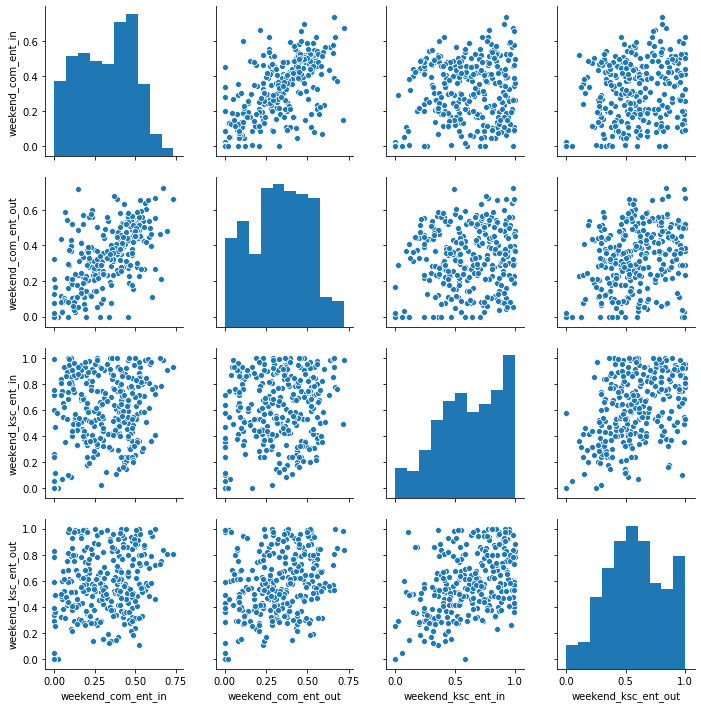

In [34]:
sns.pairplot(entropy_df[[ col for col in entropy_df.columns if "weekend" in col ]])

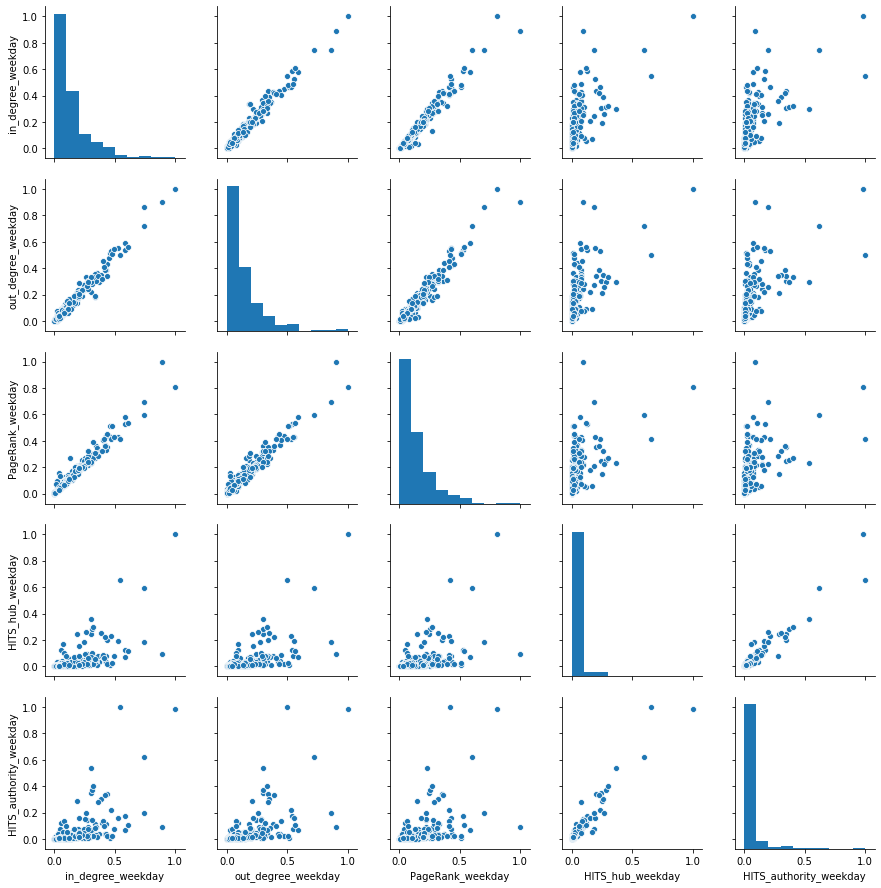

In [10]:
sns.pairplot(node_df[[ col for col in node_df.columns if "weekday" in col ]])

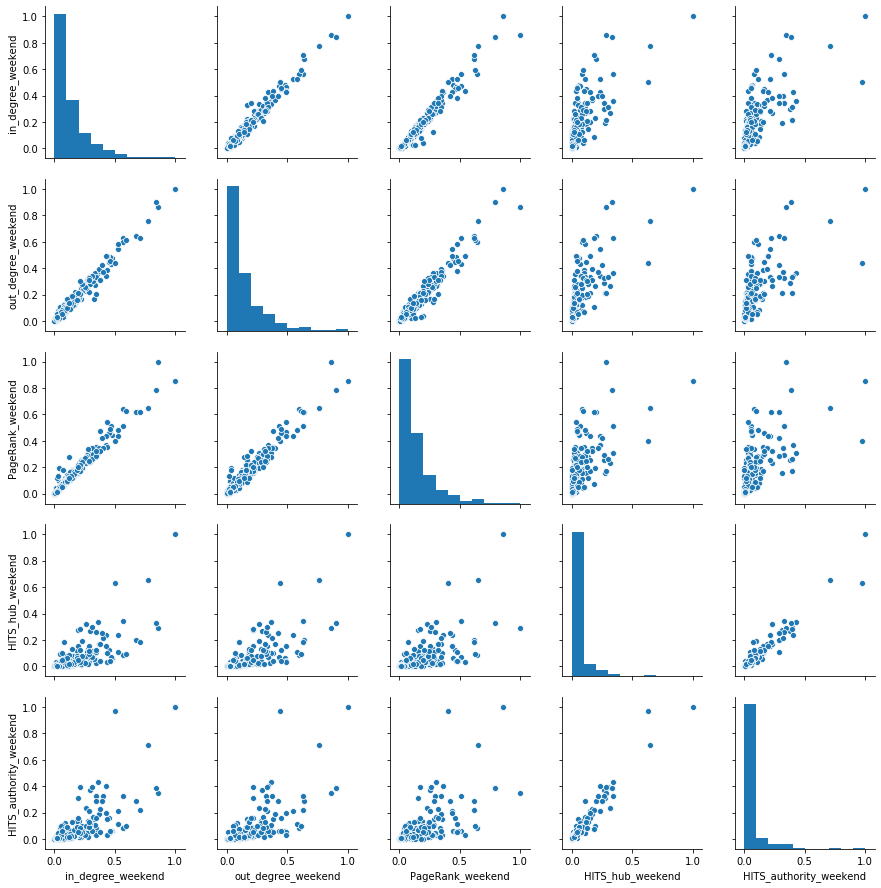

In [11]:
sns.pairplot(node_df[[ col for col in node_df.columns if "weekend" in col ]])

In [35]:
diversity_weekday = entropy_df[["node"]+[ col for col in entropy_df.columns if "weekday" in col ]]
density_weekday = node_df[["node"]+[ col for col in node_df.columns if "weekday" in col ]]
weekday_df = pd.merge(diversity_weekday, density_weekday, left_on="node", right_on="node")
print(len(weekday_df))
weekday_df.head()

303


,node,weekday_com_ent_in,weekday_com_ent_out,weekday_ksc_ent_in,weekday_ksc_ent_out,in_degree_weekday,out_degree_weekday,PageRank_weekday,HITS_hub_weekday,HITS_authority_weekday
0,TAMPINES EAST,0.353991,0.311314,0.739688,0.602029,1.000000,1.000000,0.809626,1.000000,0.981290
1,BEDOK NORTH,0.229097,0.178567,0.278536,0.362557,0.743752,0.722713,0.597994,0.593296,0.618656
2,TOA PAYOH CENTRAL,0.503925,0.463503,0.862226,0.891770,0.580808,0.588608,0.583015,0.067539,0.068743
3,ALJUNIED,0.401774,0.432890,0.524651,0.625371,0.585613,0.536596,0.530093,0.123671,0.172411
4,TAMPINES WEST,0.249632,0.302093,0.246644,0.407002,0.546944,0.497697,0.417189,0.653754,1.000000


In [36]:
diversity_weekend = entropy_df[["node"]+[ col for col in entropy_df.columns if "weekend" in col ]]
density_weekend = node_df[["node"]+[ col for col in node_df.columns if "weekend" in col ]]
weekend_df = pd.merge(diversity_weekend, density_weekend, left_on="node", right_on="node")
print(len(weekend_df))
weekend_df.head()

303


,node,weekend_com_ent_in,weekend_com_ent_out,weekend_ksc_ent_in,weekend_ksc_ent_out,in_degree_weekend,out_degree_weekend,PageRank_weekend,HITS_hub_weekend,HITS_authority_weekend
0,TAMPINES EAST,0.294636,0.294559,0.742309,0.577384,1.000000,1.000000,0.855889,1.000000,1.000000
1,BEDOK NORTH,0.346991,0.281375,0.303022,0.385173,0.776493,0.760761,0.652034,0.650845,0.710746
2,TOA PAYOH CENTRAL,0.519752,0.497265,0.927147,0.953020,0.592434,0.609961,0.625533,0.094740,0.096018
3,ALJUNIED,0.293779,0.342999,0.437139,0.536421,0.678239,0.641214,0.620737,0.200231,0.289960
4,TAMPINES WEST,0.199284,0.215336,0.239497,0.342111,0.498886,0.439493,0.399245,0.633969,0.970497


In [37]:
weekday_df.columns

Index(['node', 'weekday_com_ent_in', 'weekday_com_ent_out',
       'weekday_ksc_ent_in', 'weekday_ksc_ent_out', 'in_degree_weekday',
       'out_degree_weekday', 'PageRank_weekday', 'HITS_hub_weekday',
       'HITS_authority_weekday'],
      dtype='object')

In [38]:
weekday_spread = weekday_df[['node', 'weekday_com_ent_out', 'weekday_ksc_ent_out', 'out_degree_weekday', 'HITS_hub_weekday', 'PageRank_weekday', ]]
weekend_spread = weekend_df[['node', 'weekend_com_ent_out', 'weekend_ksc_ent_out', 'out_degree_weekend', 'HITS_hub_weekend', 'PageRank_weekend', ]]

In [39]:
weekday_receiv = weekday_df[['node', 'weekday_com_ent_in', 'weekday_ksc_ent_in', 'in_degree_weekday', 'HITS_authority_weekday', 'PageRank_weekday', ]]
weekend_receiv = weekend_df[['node', 'weekend_com_ent_in', 'weekend_ksc_ent_in', 'in_degree_weekend', 'HITS_authority_weekend', 'PageRank_weekend', ]]

In [40]:
weekday_spread_node = weekday_spread["node"]
weekday_spread_1 = (weekday_spread["weekday_com_ent_out"] * weekday_spread["weekday_ksc_ent_out"] * weekday_spread["out_degree_weekday"])**(1./3.)
weekday_spread_2 = (weekday_spread["weekday_com_ent_out"] * weekday_spread["weekday_ksc_ent_out"] * weekday_spread["HITS_hub_weekday"])**(1./3.)
weekday_spread_3 = (weekday_spread["weekday_com_ent_out"] * weekday_spread["weekday_ksc_ent_out"] * weekday_spread["PageRank_weekday"])**(1./3.)

weekday_spread_res = pd.DataFrame({"node": weekday_spread_node, "cal_dc": weekday_spread_1, "cal_hh": weekday_spread_2, "cal_pr": weekday_spread_3})
weekday_spread_res.head()

,node,cal_dc,cal_hh,cal_pr
0,TAMPINES EAST,0.572276,0.572276,0.533376
1,BEDOK NORTH,0.360342,0.337404,0.338292
2,TOA PAYOH CENTRAL,0.624277,0.303357,0.622293
3,ALJUNIED,0.525679,0.322300,0.523547
4,TAMPINES WEST,0.394065,0.431569,0.371555


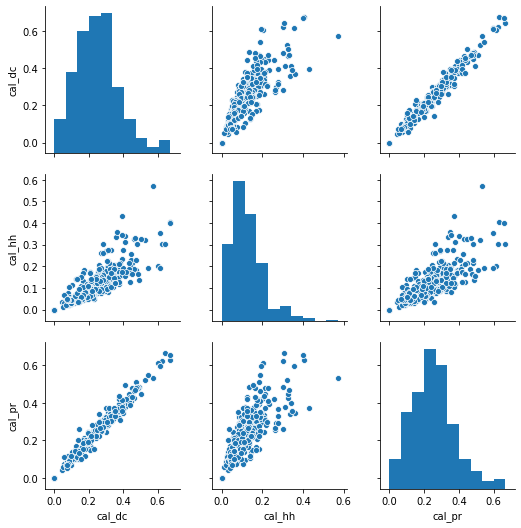

In [41]:
sns.pairplot(weekday_spread_res)

In [42]:
weekday_spread_res.corr()

,cal_dc,cal_hh,cal_pr
cal_dc,1.000000,0.803296,0.982780
cal_hh,0.803296,1.000000,0.757011
cal_pr,0.982780,0.757011,1.000000


In [43]:
weekend_spread_node = weekend_spread["node"]
weekend_spread_1 = (weekend_spread["weekend_com_ent_out"] * weekend_spread["weekend_ksc_ent_out"] * weekend_spread["out_degree_weekend"])**(1./3.)
weekend_spread_2 = (weekend_spread["weekend_com_ent_out"] * weekend_spread["weekend_ksc_ent_out"] * weekend_spread["HITS_hub_weekend"])**(1./3.)
weekend_spread_3 = (weekend_spread["weekend_com_ent_out"] * weekend_spread["weekend_ksc_ent_out"] * weekend_spread["PageRank_weekend"])**(1./3.)

weekend_spread_res = pd.DataFrame({"node": weekend_spread_node, "cal_dc": weekend_spread_1, "cal_hh": weekend_spread_2, "cal_pr": weekend_spread_3})
weekend_spread_res.head()

,node,cal_dc,cal_hh,cal_pr
0,TAMPINES EAST,0.554046,0.554046,0.526039
1,BEDOK NORTH,0.435241,0.413180,0.413432
2,TOA PAYOH CENTRAL,0.661196,0.355419,0.666776
3,ALJUNIED,0.490456,0.332743,0.485179
4,TAMPINES WEST,0.318722,0.360123,0.308679


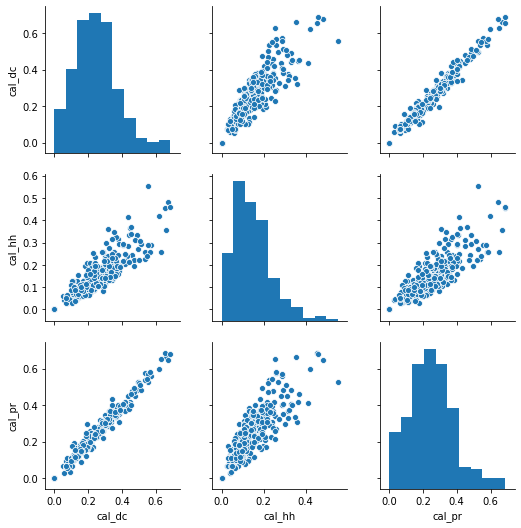

In [44]:
sns.pairplot(weekend_spread_res)

In [45]:
weekend_spread_res.corr()

,cal_dc,cal_hh,cal_pr
cal_dc,1.000000,0.873056,0.984640
cal_hh,0.873056,1.000000,0.835909
cal_pr,0.984640,0.835909,1.000000


In [46]:
weekday_receiv_node = weekday_receiv["node"]
weekday_receiv_1 = (weekday_receiv["weekday_com_ent_in"] * weekday_receiv["weekday_ksc_ent_in"] * weekday_receiv["in_degree_weekday"])**(1./3.)
weekday_receiv_2 = (weekday_receiv["weekday_com_ent_in"] * weekday_receiv["weekday_ksc_ent_in"] * weekday_receiv["HITS_authority_weekday"])**(1./3.)
weekday_receiv_3 = (weekday_receiv["weekday_com_ent_in"] * weekday_receiv["weekday_ksc_ent_in"] * weekday_receiv["PageRank_weekday"])**(1./3.)

weekday_receiv_res = pd.DataFrame({"node": weekday_receiv_node, "cal_dc": weekday_receiv_1, "cal_ha": weekday_receiv_2, "cal_pr": weekday_receiv_3})
weekday_receiv_res.head()

,node,cal_dc,cal_ha,cal_pr
0,TAMPINES EAST,0.639755,0.635740,0.596268
1,BEDOK NORTH,0.362057,0.340500,0.336666
2,TOA PAYOH CENTRAL,0.631936,0.310269,0.632736
3,ALJUNIED,0.497914,0.331237,0.481654
4,TAMPINES WEST,0.322927,0.394873,0.295054


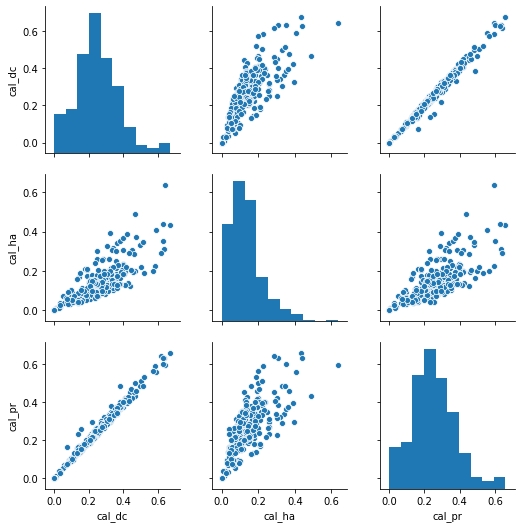

In [47]:
sns.pairplot(weekday_receiv_res)

In [48]:
weekday_receiv_res.corr()

,cal_dc,cal_ha,cal_pr
cal_dc,1.000000,0.799165,0.991076
cal_ha,0.799165,1.000000,0.752700
cal_pr,0.991076,0.752700,1.000000


In [49]:
weekend_receiv_node = weekend_receiv["node"]
weekend_receiv_1 = (weekend_receiv["weekend_com_ent_in"] * weekend_receiv["weekend_ksc_ent_in"] * weekend_receiv["in_degree_weekend"])**(1./3.)
weekend_receiv_2 = (weekend_receiv["weekend_com_ent_in"] * weekend_receiv["weekend_ksc_ent_in"] * weekend_receiv["HITS_authority_weekend"])**(1./3.)
weekend_receiv_3 = (weekend_receiv["weekend_com_ent_in"] * weekend_receiv["weekend_ksc_ent_in"] * weekend_receiv["PageRank_weekend"])**(1./3.)

weekend_receiv_res = pd.DataFrame({"node": weekend_receiv_node, "cal_dc": weekend_receiv_1, "cal_ha": weekend_receiv_2, "cal_pr": weekend_receiv_3})
weekend_receiv_res.head()

,node,cal_dc,cal_ha,cal_pr
0,TAMPINES EAST,0.602500,0.602500,0.572044
1,BEDOK NORTH,0.433820,0.421214,0.409280
2,TOA PAYOH CENTRAL,0.658458,0.359004,0.670499
3,ALJUNIED,0.443276,0.333933,0.430377
4,TAMPINES WEST,0.287690,0.359133,0.267098


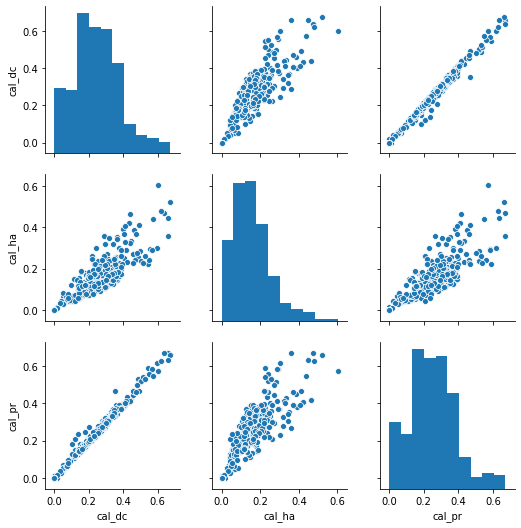

In [50]:
sns.pairplot(weekend_receiv_res)

In [51]:
weekend_receiv_res.corr()

,cal_dc,cal_ha,cal_pr
cal_dc,1.000000,0.860656,0.992086
cal_ha,0.860656,1.000000,0.821600
cal_pr,0.992086,0.821600,1.000000


In [52]:
weekday_res = pd.merge(weekday_spread_res, weekday_receiv_res, left_on="node", right_on="node", suffixes=("_spreader", "_receiver"))
print(len(weekday_res))
weekday_res.head()

303


,node,cal_dc_spreader,cal_hh,cal_pr_spreader,cal_dc_receiver,cal_ha,cal_pr_receiver
0,TAMPINES EAST,0.572276,0.572276,0.533376,0.639755,0.635740,0.596268
1,BEDOK NORTH,0.360342,0.337404,0.338292,0.362057,0.340500,0.336666
2,TOA PAYOH CENTRAL,0.624277,0.303357,0.622293,0.631936,0.310269,0.632736
3,ALJUNIED,0.525679,0.322300,0.523547,0.497914,0.331237,0.481654
4,TAMPINES WEST,0.394065,0.431569,0.371555,0.322927,0.394873,0.295054


In [53]:
weekend_res = pd.merge(weekend_spread_res, weekend_receiv_res, left_on="node", right_on="node", suffixes=("_spreader", "_receiver"))
print(len(weekend_res))
weekend_res.head()

303


,node,cal_dc_spreader,cal_hh,cal_pr_spreader,cal_dc_receiver,cal_ha,cal_pr_receiver
0,TAMPINES EAST,0.554046,0.554046,0.526039,0.602500,0.602500,0.572044
1,BEDOK NORTH,0.435241,0.413180,0.413432,0.433820,0.421214,0.409280
2,TOA PAYOH CENTRAL,0.661196,0.355419,0.666776,0.658458,0.359004,0.670499
3,ALJUNIED,0.490456,0.332743,0.485179,0.443276,0.333933,0.430377
4,TAMPINES WEST,0.318722,0.360123,0.308679,0.287690,0.359133,0.267098


In [54]:
weekday_res.to_csv("Super_SR_weekday.csv", index_label="ind")
weekend_res.to_csv("Super_SR_weekend.csv", index_label="ind")